In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def lineal(x, a, b):
    return a*x + b
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    return predicciones, ajuste, errores, r_cuadrado

def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 40, fontweight='bold')
    plt.xlabel(ejex, fontsize = 20)
    plt.ylabel(ejey, fontsize = 20)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
def grafico_modelo(x, y, predicciones, ajuste, errores, r_cuad):
    plt.plot(x, y, 'bo')
    plt.plot(x, predicciones, 'r-',
             label = (' a = ' + cifras_signif(ajuste[0], 2)
                      + 'std_a = ' + cifras_signif(errores[0], 2) + '\n'
                      + ' b = ' + cifras_signif(ajuste[1], 2)
                      + ' std_b = ' + cifras_signif(errores[1], 2) + '\n'
                      + ' R^2 = ' + cifras_signif(r_cuad, 2)
                     )
             )
    plt.legend()
    return

def regresion_y_grafico(modelo, x, y, titulo, xlabel, ylabel):
    predicciones, ajuste, errores, r_cuadrado = regresion(modelo, x, y)
    scatter = plt.figure(figsize = (18, 9))
    metadata(titulo, xlabel, ylabel)
    grafico_modelo(x, y, predicciones, ajuste, errores, r_cuadrado)
    return

In [4]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_7.txt',
    delimiter = ' ',
    decimal = '.',
    )

In [5]:
datos.head()

,Anio,Temperatura_Marzo(C),Rendimiento(kg/ha)
0,1960,17.0,1270
1,1961,12.0,980
2,1962,14.0,1090
3,1963,14.5,1150
4,1964,10.0,780


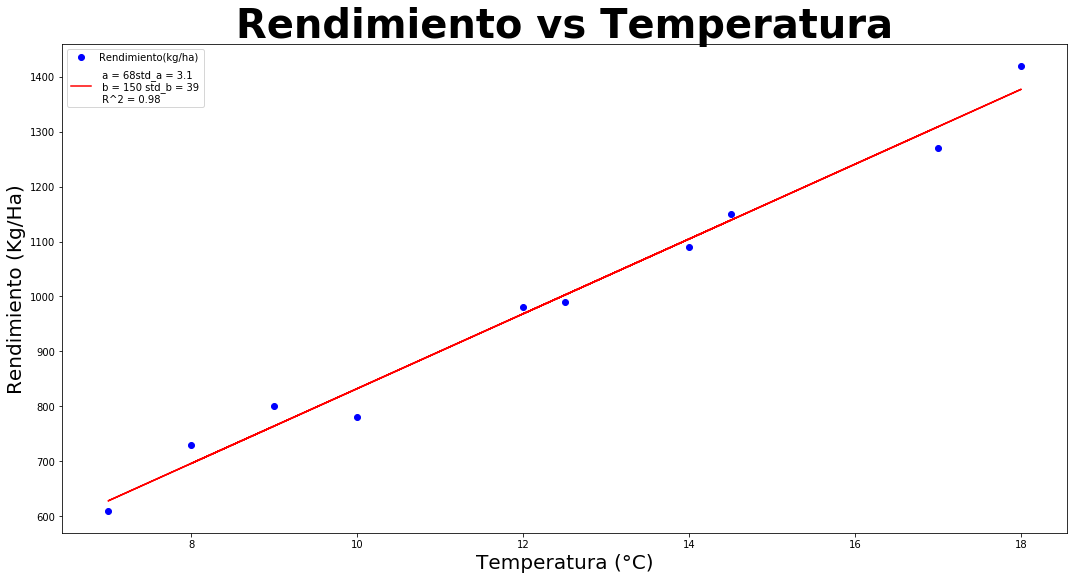

In [6]:
regresion_y_grafico(lineal, datos['Temperatura_Marzo(C)'], datos['Rendimiento(kg/ha)'],
                    'Rendimiento vs Temperatura', 'Temperatura (°C)', 'Rendimiento (Kg/Ha)')